# Berkshire Hathaway Stock Price Prediction

This model attempts to predict the stck prices dated between **3rd January 2011** to **31st December 2020**. I have used several ML models combined via pipelines and grid search cross validation.

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
df = pd.read_csv('data.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-2011,80.500000,80.839996,80.220001,80.410004,5573500
1,04-01-2011,80.330002,80.389999,79.720001,80.169998,4020400
2,05-01-2011,79.989998,80.910004,79.800003,80.910004,4107800
3,06-01-2011,80.930000,80.980003,80.370003,80.370003,3938000
4,07-01-2011,80.610001,80.699997,79.500000,79.739998,3809600


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
2512,24-12-2020,224.600006,227.130005,224.210007,226.529999,2387000
2513,28-12-2020,228.089996,230.149994,227.360001,228.410004,3505500
2514,29-12-2020,230.500000,231.100006,229.100006,229.570007,3799500
2515,30-12-2020,229.539993,230.589996,229.080002,229.649994,3257400
2516,31-12-2020,229.279999,232.279999,228.889999,231.869995,4228100


In [5]:
# checking for null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

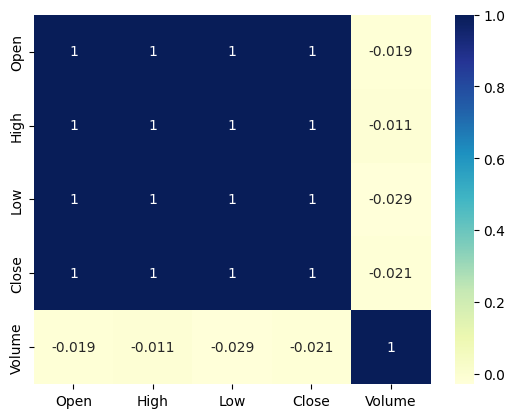

In [6]:
# plotting the correlation matrix
df_new = df.drop('Date', axis = 1)
sns.heatmap(df_new.corr(), cmap = "YlGnBu", annot = True)
plt.show()

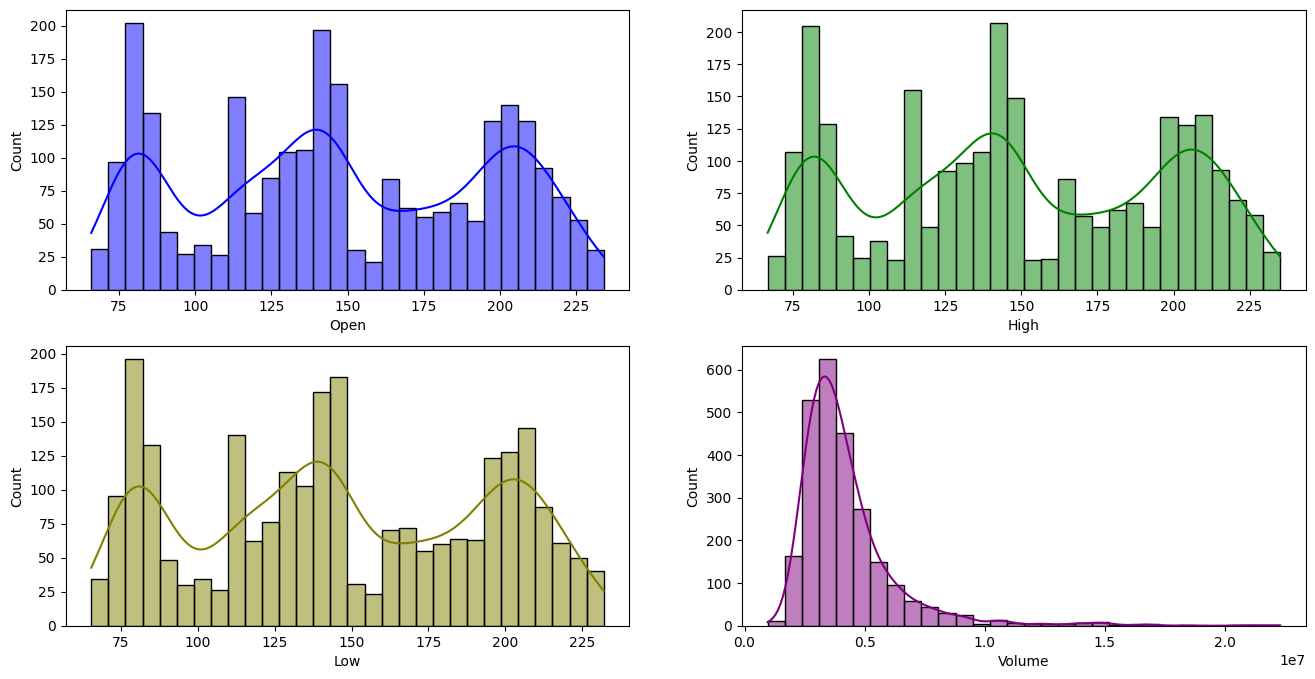

In [7]:
# checking the distributions of the columns of the dataset
columns = ['Open', 'High', 'Low', 'Volume']

fig, ax = plt.subplots(2, 2, figsize = (16, 8))

sns.histplot(data = df, x = 'Open', kde = True, color = 'blue', ax = ax[0][0], bins = 30)
sns.histplot(data = df, x = 'High', kde = True, color = 'green', ax = ax[0][1], bins = 30)
sns.histplot(data = df, x = 'Low', kde = True, color = 'olive', ax = ax[1][0], bins = 30)
sns.histplot(data = df, x = 'Volume', kde = True, color = 'purple', ax = ax[1][1], bins = 30)

plt.ylabel('Count')
plt.show()

In [8]:
df_temp = df.drop(['Date', 'Close'], axis = 1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_temp)

In [9]:
scaled_df = pd.DataFrame(scaled_df, columns = ['Open', 'High', 'Low', 'Volume'])
scaled_df['Close'] = df['Close']

X = scaled_df.drop(['Close'], axis = 1)
y = scaled_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
# we create a define the models and create list of their parameters
classifiers = [
    SGDRegressor(random_state = 42), 
    SVR(), 
    RandomForestRegressor(random_state = 42)
]

# parameter grids for the various classifiers
sgd_parameters = {
    'classifier__loss': ['squared_error'],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__shuffle': [True]
}

svr_parameters = {
    'classifier__C': [0.1, 1, 10, 100, 1000], 
    'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'classifier__kernel': ['linear']
}

randomforest_parameters = {
    'classifier__n_estimators': [50, 100, 200, 300]
}

In [11]:
# stores all the parameters in a list 
parameters = [
    sgd_parameters,
    svr_parameters, 
    randomforest_parameters
]

for i, classifier in enumerate(classifiers):
    # create a Pipeline object
    pipe = Pipeline(steps = [
        ('classifier', classifier)
    ])
    
    gs = GridSearchCV(pipe,                 # model
              param_grid = parameters[i],   # hyperparameters
              scoring = r2_score,         # metric for scoring 
              n_jobs = -1,
              cv = 5)
    
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)

In [12]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier__n_estimators': 50}

In [13]:
# Accuracy score for the best model
gs.best_score_

nan

In [14]:
# Test data performance
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.9995588869302326
MAE : 0.6080684273333328
RMSE: 1.018644870206062
